# Finding the Needle in the Haystack(건초에서 바늘찾기)

In [12]:
%matplotlib inline
import pandas as pd
import pylab as plt
import numpy as np

## Titanic Data

The following are the field descriptions:

<table>
<tr><th>속성</th>
<th>설명</th>
</tr>
<tr><td>survival</td>
<td>Survival(0 = No; 1 = Yes)</td>
</tr>
<tr><td>pclass</td>
<td>Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)</td>
</tr>
<tr><td>name</td>
<td>Name of the passenger</td>
</tr>
<tr><td>sex</td>
<td>Gender of the passenger</td>
</tr>
<tr><td>age</td>
<td>Age of the passenger</td>
</tr>
<tr><td>sibsp</td>
<td>Number of Siblings/Spouses Aboard</td>
</tr>
<tr><td>parch</td>
<td>Number of Parents/Children Aboard</td>
</tr>
<tr><td>ticket</td>
<td>Ticket Number</td>
</tr>
<tr><td>fare</td>
<td>Passenger Fare</td>
</tr>
<tr><td>cabin</td>
<td>Cabin</td>
</tr>
<tr><td>embarked</td>
<td>Port of Embarkation
(C = Cherbourg; Q = Queenstown; S = Southampton)
</td></tr>
</table>


In [3]:
df = pd.read_csv('Data/titanic data.csv')

##  좌석 등급별 어떤 등급의 탑승객이 생존인원이 가장 높을 것인가?

Checking if there is any null values

In [40]:
df['Pclass'].isnull().value_counts()

False    891
dtype: int64

In [39]:
df['Survived'].isnull().value_counts()

False    891
dtype: int64

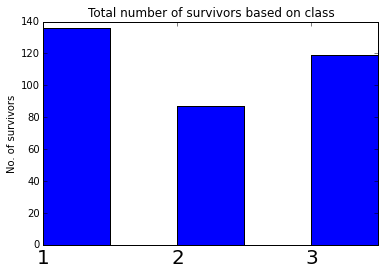

In [41]:
#Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

#Total Passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers


#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)

plt.show()

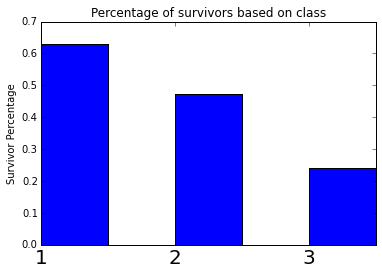

In [8]:
#Plotting the percentage of survivors in each class

fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()


## 좌석 등급별 생존자들의 성별 분포는 어떠한가?

In [9]:
#Checking for any null values
df['Sex'].isnull().value_counts()

False    891
dtype: int64

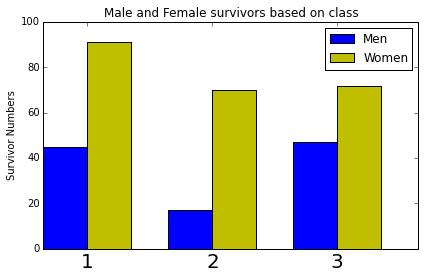

In [13]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

#Plotting the total passengers who survived based on Gender 
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35

rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')

ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


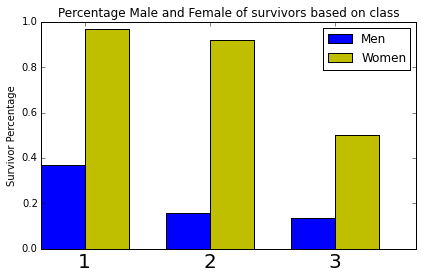

In [14]:
#Plotting the percentage of passengers who survived based on Gender 
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35

rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')

ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

## 가족이 배에 탑승한 비생존자들의 좌석 등급별 분포는 어떠한가?

In [15]:
#Checking for the null values
df['SibSp'].isnull().value_counts()

False    891
dtype: int64

In [16]:
#Checking for the null values
df['Parch'].isnull().value_counts()

False    891
dtype: int64

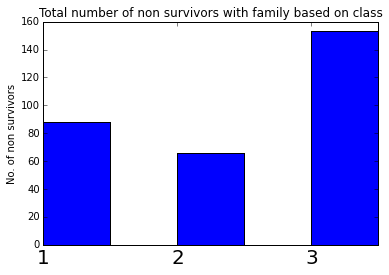

In [17]:
#Total number of non-survivors in each class
non_survivors = df[(df['SibSp'] > 0) | (df['Parch'] > 0) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)

plt.show()


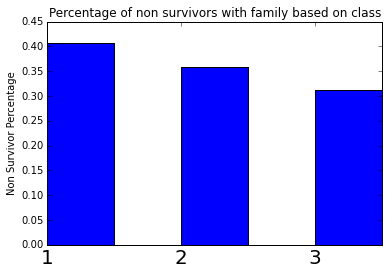

In [18]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()


## 나이대별 생존 확률은 어떠한가?

In [20]:
#Checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
dtype: int64

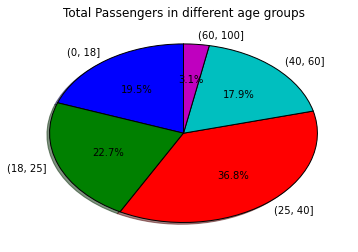

In [38]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df['Age'])]  # removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values.tolist(),
    autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Total Passengers in different age groups')
plt.show()



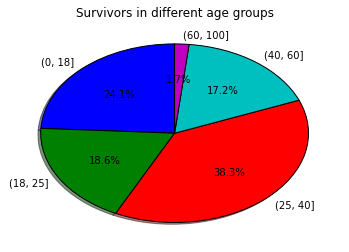

In [37]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values.tolist(),
    autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Survivors in different age groups')
plt.show()